In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns
#df_survey = pd.read_csv('/content/drive/MyDrive/Thesis Research/Data/df_survey.csv')
df_survey = pd.read_csv('/content/drive/MyDrive/Thesis Research/Data/df_survey_.csv')

### Prepare data

In [ ]:
df_survey = df_survey.astype({'market_in_com': int})
df_survey = df_survey[df_survey['area']>0.000001]
df_survey['phone'] = np.where(df_survey['phone']>0, 1, 0)


In [ ]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398 entries, 0 to 3402
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hhid            3398 non-null   int64  
 1   cropcode        3398 non-null   object 
 2   ea              3398 non-null   int64  
 3   area            3398 non-null   float64
 4   state           3398 non-null   object 
 5   qty_h_kg        3398 non-null   float64
 6   qty_s_kg        3398 non-null   float64
 7   value_sold      3398 non-null   float64
 8   phone           3398 non-null   int64  
 9   internet        3398 non-null   int64  
 10  market_in_com   3398 non-null   int64  
 11  annual_temp     3398 non-null   float64
 12  dist_state_cap  3398 non-null   float64
 13  annual_precip   3398 non-null   float64
 14  slope           3398 non-null   float64
 15  elevation       3398 non-null   float64
 16  year            3398 non-null   int64  
 17  lg_value_sold   3398 non-null   f

In [ ]:
df_survey_sum = df_survey.groupby(['state', 'year']).agg({'hhid':'count', 'area':'sum', 'qty_h_kg':'sum', 'qty_s_kg':'sum', 'value_sold':'sum', 'internet':'sum'}).reset_index()



*   Plot area per state
*   value sold
*   Qty harvest - Qty sold = loss / conssumed /potential revenue
*   Number of farmers per state in the survey





In [ ]:
df_survey_sum['loss'] = df_survey_sum['qty_h_kg'] - df_survey_sum['qty_s_kg']

In [ ]:
df_survey_sum = df_survey.groupby(['state', 'year']).agg({'hhid':'count', 'area':'sum', 'qty_h_kg':'sum', 'qty_s_kg':'sum', 'value_sold':'sum', 'internet':'sum'}).reset_index()
df_survey_sum.to_csv('nga_survey.csv')

NameError: ignored

In [ ]:
df_survey = df_survey[df_survey['value_sold'] > 0.000001]

In [ ]:

df_survey.to_csv('r_survey.csv')

In [ ]:
def get_log():
  df_survey['lg_value_sold'] = np.log(df_survey['value_sold'])
  df_survey['lg_qty_s_kg'] = np.log(df_survey['qty_s_kg'])
  df_survey['lg_qty_h_kg'] = np.log(df_survey['qty_h_kg'])
  df_survey['lg_area'] = np.log(df_survey['area'])
  df_survey['dist_state_cap'] = np.log(df_survey['dist_state_cap'])


get_log()

<ipython-input-70-456d88b2b2a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey['lg_value_sold'] = np.log(df_survey['value_sold'])
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-70-456d88b2b2a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey['lg_qty_s_kg'] = np.log(df_survey['qty_s_kg'])
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike

#### Correlation table

In [ ]:
df_survey = df_survey.astype({'state':str})
df_survey[[ 'area', 'state',  'qty_h_kg', 'qty_s_kg',
        'value_sold', 'phone', 'internet',
       'market_in_com', 'annual_temp',	'dist_state_cap',	'annual_precip',
       'slope',	'elevation',	'year']].corr().round(2)

<ipython-input-71-9525bea5eeb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_survey[[ 'area', 'state',  'qty_h_kg', 'qty_s_kg',


,area,qty_h_kg,qty_s_kg,value_sold,phone,internet,market_in_com,annual_temp,dist_state_cap,annual_precip,slope,elevation,year
area,1.00,0.03,0.08,0.04,0.01,-0.01,0.06,-0.00,0.03,-0.03,-0.00,0.02,-0.03
qty_h_kg,0.03,1.00,0.58,0.07,0.03,0.04,-0.03,0.04,0.02,0.05,0.01,-0.06,0.07
qty_s_kg,0.08,0.58,1.00,0.11,0.02,0.04,-0.00,-0.00,-0.01,0.04,0.03,-0.02,0.05
value_sold,0.04,0.07,0.11,1.00,0.01,0.02,-0.01,-0.00,0.03,-0.04,0.04,-0.00,0.07
phone,0.01,0.03,0.02,0.01,1.00,0.01,0.04,0.01,-0.05,0.03,0.05,-0.03,-0.09
internet,-0.01,0.04,0.04,0.02,0.01,1.00,0.04,-0.01,-0.01,0.06,-0.04,-0.02,0.19
market_in_com,0.06,-0.03,-0.00,-0.01,0.04,0.04,1.00,-0.04,0.00,-0.03,0.05,0.02,-0.12
annual_temp,-0.00,0.04,-0.00,-0.00,0.01,-0.01,-0.04,1.00,-0.10,0.05,-0.23,-0.78,0.03
dist_state_cap,0.03,0.02,-0.01,0.03,-0.05,-0.01,0.00,-0.10,1.00,-0.32,0.05,0.25,-0.03
annual_precip,-0.03,0.05,0.04,-0.04,0.03,0.06,-0.03,0.05,-0.32,1.00,0.12,-0.55,0.14


In [ ]:
df_survey[[ 'lg_area', 'state',  'lg_qty_h_kg', 'lg_qty_s_kg',
        'lg_value_sold', 'phone', 'internet',
       'market_in_com', 'annual_temp',	'dist_state_cap',	'annual_precip',
       'slope',	'elevation',	'year']].corr().round(2)

<ipython-input-72-80e03fd1fba5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_survey[[ 'lg_area', 'state',  'lg_qty_h_kg', 'lg_qty_s_kg',


,lg_area,lg_qty_h_kg,lg_qty_s_kg,lg_value_sold,phone,internet,market_in_com,annual_temp,dist_state_cap,annual_precip,slope,elevation,year
lg_area,1.00,0.25,0.25,0.62,-0.01,-0.00,-0.00,-0.01,0.26,-0.47,-0.08,0.27,-0.09
lg_qty_h_kg,0.25,1.00,0.97,0.36,0.04,-0.06,-0.00,0.02,0.04,0.02,0.10,-0.03,-0.36
lg_qty_s_kg,0.25,0.97,1.00,0.42,0.04,-0.06,-0.00,0.01,0.02,0.02,0.10,-0.03,-0.36
lg_value_sold,0.62,0.36,0.42,1.00,0.03,0.03,-0.02,-0.01,0.11,-0.20,0.00,0.10,0.06
phone,-0.01,0.04,0.04,0.03,1.00,0.01,0.04,0.01,-0.05,0.03,0.05,-0.03,-0.09
internet,-0.00,-0.06,-0.06,0.03,0.01,1.00,0.04,-0.01,-0.01,0.06,-0.04,-0.02,0.19
market_in_com,-0.00,-0.00,-0.00,-0.02,0.04,0.04,1.00,-0.04,0.00,-0.03,0.05,0.02,-0.12
annual_temp,-0.01,0.02,0.01,-0.01,0.01,-0.01,-0.04,1.00,-0.10,0.05,-0.23,-0.78,0.03
dist_state_cap,0.26,0.04,0.02,0.11,-0.05,-0.01,0.00,-0.10,1.00,-0.32,0.05,0.25,-0.03
annual_precip,-0.47,0.02,0.02,-0.20,0.03,0.06,-0.03,0.05,-0.32,1.00,0.12,-0.55,0.14


 **F-stat**  
A very high F-stat means that the variation among group means is more than what you'd expect to see by chance

In [ ]:
df_survey['year'].unique()

array([2010, 2012, 2015, 2018])

### Visualize linear relationship

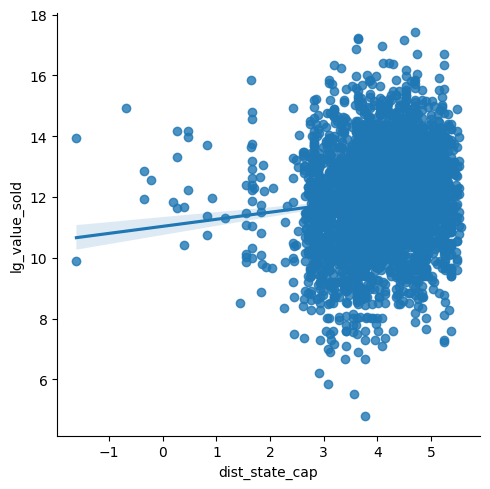

In [ ]:
#lg(area)
sns.lmplot(y='lg_value_sold',x='dist_state_cap', data=df_survey)

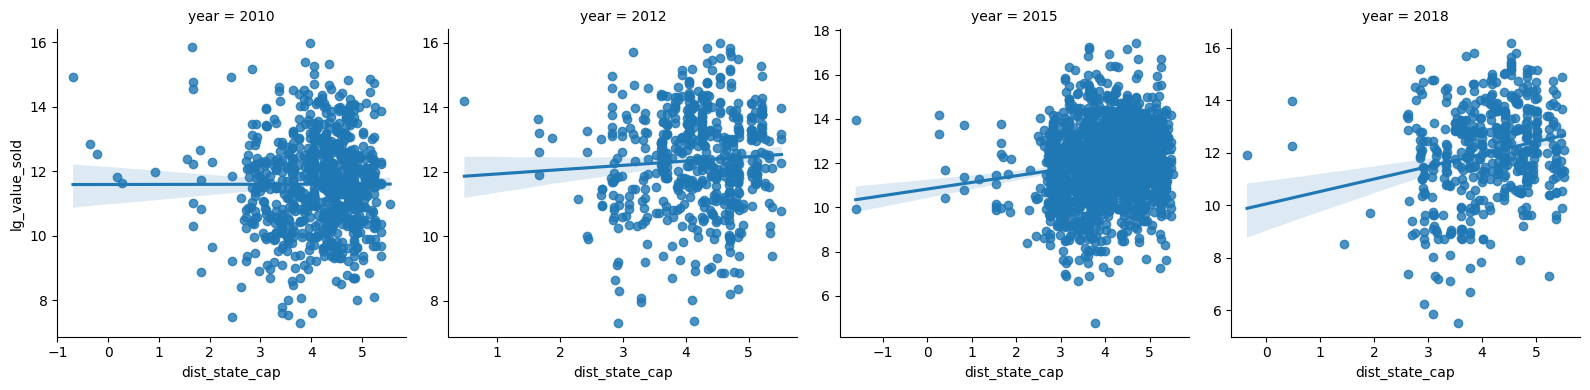

In [ ]:
sns.lmplot(
    data=df_survey, y="lg_value_sold", x="dist_state_cap",
    col="year", height=4,
    facet_kws=dict(sharex=False, sharey=False),
)

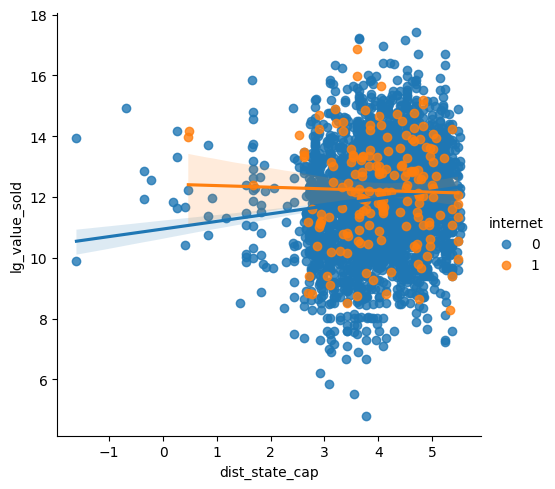

In [ ]:
sns.lmplot(y='lg_value_sold',x='dist_state_cap', hue='internet', data=df_survey)

Log Log relatioship here needs to be explain and highligthed during presentation

In [ ]:
mod1 = ols(formula = 'lg_value_sold ~ dist_state_cap + internet + phone', data = df_survey).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lg_value_sold   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     18.24
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           9.79e-12
Time:                        21:30:14   Log-Likelihood:                -6504.7
No. Observations:                3398   AIC:                         1.302e+04
Df Residuals:                    3394   BIC:                         1.304e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.6697      0.207     51.461      0.000      10.263      11.076
dist_state_cap     0.2362      0.035      6.845      0.000       0.169       0.304
internet           0.2523      0.126      2.000      0.046       0.005       0.500
phone              0.3471      0.149      2.335      0.020       0.056       0.639
==============================================================================
Omnibus:                       18.287   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.778
Skew:                          -0.160   Prob(JB):                     8.37e-05
Kurtosis:                       3.173   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mod = ols(formula = 'lg_value_sold ~ year + dist_state_cap + internet + phone + lg_area', data = df_survey).fit()
mod.summary()
#controling for observable
#before an adrwe t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lg_value_sold   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     466.5
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:30:14   Log-Likelihood:                -5642.8
No. Observations:                3398   AIC:                         1.130e+04
Df Residuals:                    3392   BIC:                         1.133e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -141.3385     17.213     -8.211      0.000    -175.087    -107.591
year               0.0759      0.009      8.885      0.000       0.059       0.093
dist_state_cap    -0.0913      0.028     -3.295      0.001      -0.146      -0.037
internet           0.0630      0.100      0.631      0.528      -0.133       0.259
phone              0.4272      0.116      3.684      0.000       0.200       0.654
lg_area            0.5262      0.011     47.103      0.000       0.504       0.548
==============================================================================
Omnibus:                       24.776   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.269
Skew:                          -0.044   Prob(JB):                     1.33e-08
Kurtosis:                       3.498   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


In [ ]:
df_survey.dtypes

hhid                int64
cropcode           object
ea                  int64
area              float64
state              object
qty_h_kg          float64
qty_s_kg          float64
value_sold        float64
phone               int64
internet            int64
market_in_com       int64
annual_temp       float64
dist_state_cap    float64
annual_precip     float64
slope             float64
elevation         float64
year                int64
lg_value_sold     float64
lg_qty_s_kg       float64
lg_qty_h_kg       float64
lg_area           float64
dtype: object

In [ ]:
#x = df_survey[[ 'area', 'state',  'qty_h_kg', 'qty_s_kg', 'phone', 'internet','market_in_com']]
x = df_survey[[ 'lg_area', 'phone', 'internet','market_in_com' , 'year', 'annual_temp',	'dist_state_cap',	'annual_precip',	'slope',	'elevation']]
y = df_survey[['lg_value_sold']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
#y_train_scaled=scaler.fit_transform(y_train)

x_test_scaled=scaler.fit_transform(x_test)

In [ ]:
# Create a Lasso model object
lasso = Lasso(alpha=1)

# Train the model on the training data
lasso.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = lasso.predict(x_test)

# Print the model coefficients and intercept
print("Model coefficients:", lasso.coef_)
print("Model intercept:", lasso.intercept_)

# Print the R-squared value of the model
print("Model R-squared:", lasso.score(x_test_scaled, y_test))



Model coefficients: [ 2.47617455e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.62797744e-04
  0.00000000e+00 -7.86215418e-05]
Model intercept: [12.03137707]
Model R-squared: 0.15542133094251498


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
x_test

,lg_area,phone,internet,market_in_com,year,annual_temp,dist_state_cap,annual_precip,slope,elevation
1452,-2.707550,1,0,0,2015,265.0,3.054001,2571.0,3.490000,40.0
1426,1.029619,1,0,0,2015,275.0,3.975936,908.0,0.000000,230.0
2429,-1.224176,1,0,0,2015,251.0,4.133565,1324.0,1.750000,420.0
679,-0.404965,1,0,1,2010,276.0,5.023222,1151.0,2.426484,195.0
3270,1.772713,0,0,0,2018,259.0,5.460861,1052.0,0.000000,490.0
...,...,...,...,...,...,...,...,...,...,...
37,-6.463069,1,0,0,2010,264.0,2.442347,2622.0,2.443947,67.0
1326,3.256736,1,0,0,2012,280.0,5.213358,845.0,1.270000,224.0
1373,-2.014403,1,0,0,2015,263.0,3.086487,2069.0,6.990000,130.0
2443,-0.657008,1,1,0,2015,252.0,4.672829,1384.0,5.240000,380.0


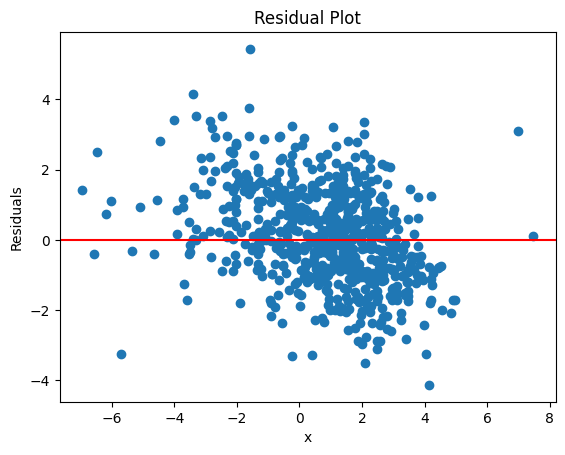

In [ ]:
residuals = y_pred - y_test['lg_value_sold'].array


# Plot the residuals
plt.scatter(x_test['lg_area'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Difference in difference

In [ ]:
mod = smf.ols('value_sold ~ market_in_com', data=df_survey)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             value_sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4549
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.500
Time:                        21:30:29   Log-Likelihood:                -53469.
No. Observations:                3398   AIC:                         1.069e+05
Df Residuals:                    3396   BIC:                         1.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.754e+05      3e+04     19.203      0.000    5.17e+05    6.34e+05
market_in_com -6.183e+04   9.17e+04     -0.674      0.500   -2.42e+05    1.18e+05
==============================================================================
Omnibus:                     5719.240   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4699260.050
Skew:                          11.346   Prob(JB):                         0.00
Kurtosis:                     183.765   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mod = smf.ols('value_sold ~ market_in_com + C(year) ', data=df_survey)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             value_sold   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.635
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.57e-05
Time:                        21:30:32   Log-Likelihood:                -53456.
No. Observations:                3398   AIC:                         1.069e+05
Df Residuals:                    3393   BIC:                         1.070e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.991e+05   6.26e+04      4.781      0.000    1.76e+05    4.22e+05
C(year)[T.2012]  3.303e+05   9.42e+04      3.505      0.000    1.46e+05    5.15e+05
C(year)[T.2015]  3.651e+05   7.29e+04      5.007      0.000    2.22e+05    5.08e+05
C(year)[T.2018]  2.936e+05   9.73e+04      3.016      0.003    1.03e+05    4.84e+05
market_in_com     4.25e+04   9.42e+04      0.451      0.652   -1.42e+05    2.27e+05
==============================================================================
Omnibus:                     5719.400   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4721894.788
Skew:                          11.344   Prob(JB):                         0.00
Kurtosis:                     184.207   Cond. No.                         5.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mod = smf.ols('value_sold ~ market_in_com + C(year) + C(ea)', data=df_survey)
mod.fit().summary()

In [ ]:
mod = smf.ols('lg_value_sold ~ market_in_com + C(year) + C(ea) + lg_area + annual_temp + slope + dist_state_cap + annual_precip +	slope	 + elevation', data=df_survey)
mod.fit().summary()

<Axes: >

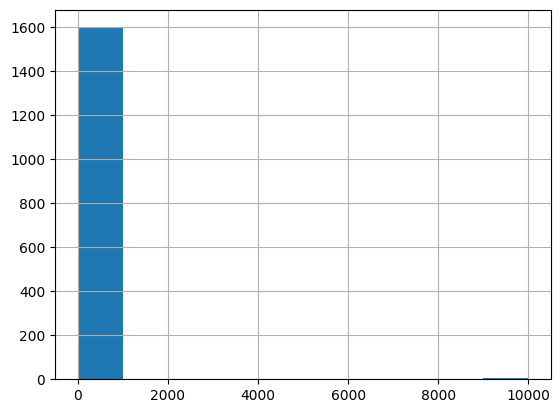

In [ ]:
df_survey['how_far_is_market'].hist()

In [ ]:
np.max(df_survey['how_far_is_market'])

9999.0

##Unsupervised Learning


### Regression Discontinuity Design

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
df_survey = pd.read_csv('/content/drive/MyDrive/Thesis Research/Data/df_survey.csv')

In [ ]:
get_log()
df_survey['treatment'] = np.where(df_survey['how_far_is_market']<4, 1, 0)
df_survey = df_survey[df_survey['how_far_is_market'] > 0]

df_survey = df_survey[df_survey['value_sold'] > 0]
df_survey = df_survey[df_survey['area'] > 0]
df_survey = df_survey.astype({'year':'str'})

In [ ]:
rd = 'lg_value_sold ~ treatment + dist_state_cap + phone + year + lg_area + annual_temp + dist_state_cap + annual_precip + slope + elevation + phone*treatment + lg_area*treatment'
basic  = smf.ols(rd, df_survey).fit()
print(basic.summary())

                            OLS Regression Results                            
Dep. Variable:          lg_value_sold   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     66.63
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          3.96e-153
Time:                        19:30:58   Log-Likelihood:                -2367.6
No. Observations:                1471   AIC:                             4767.
Df Residuals:                    1455   BIC:                             4852.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

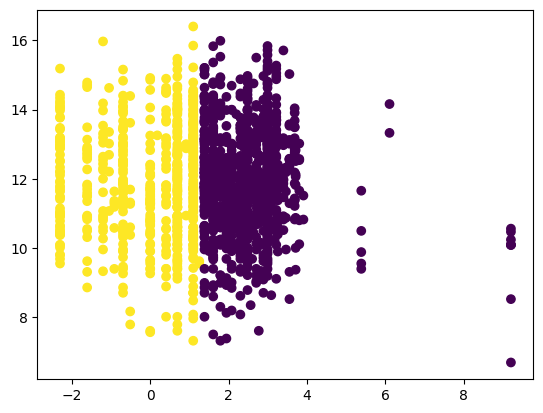

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(df_survey['lg_how_far_is_market'], df_survey['lg_value_sold'], c=df_survey['treatment'])
plt.show()

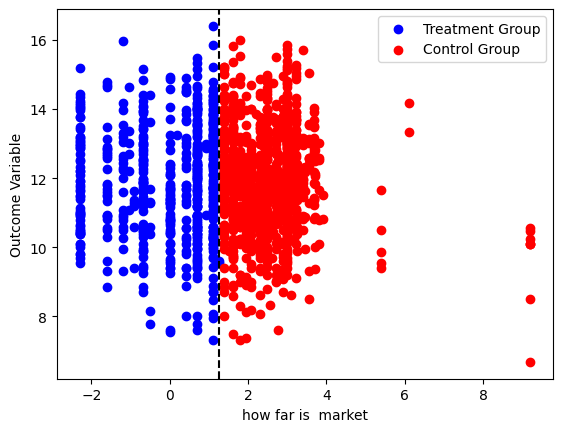

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_survey[df_survey['treatment']==1]['lg_how_far_is_market'], df_survey[df_survey['treatment']==1]['lg_value_sold'], c='blue', label='Treatment Group')
ax.scatter(df_survey[df_survey['treatment']==0]['lg_how_far_is_market'], df_survey[df_survey['treatment']==0]['lg_value_sold'], c='red', label='Control Group')
ax.axvline(x = 1.25, color='black', linestyle='--')
ax.set_xlabel('how far is  market')
ax.set_ylabel('Outcome Variable')
ax.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
bandwidth = 0.00025
too_far = df_survey[df_survey['how_far_is_market'] >= 4 - bandwidth]
close_enough = df_survey[df_survey['how_far_is_market'] < 4 + bandwidth]
X_far = too_far['lg_how_far_is_market'].values.reshape(-1, 1)
y_far = too_far['lg_value_sold']
X_near = close_enough['lg_how_far_is_market'].values.reshape(-1, 1)
y_near = close_enough['lg_value_sold']
reg_far = LinearRegression().fit(X_far, y_far)
reg_near = LinearRegression().fit(X_near, y_near)


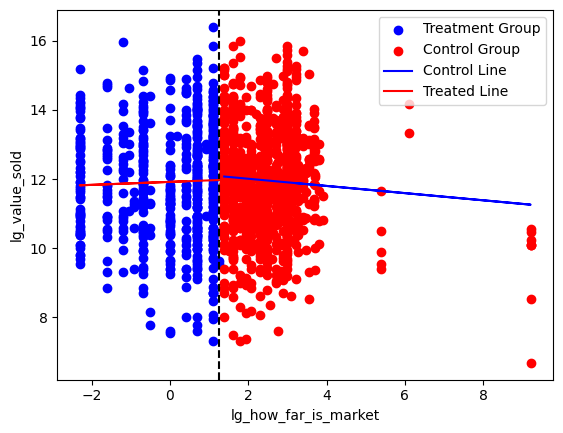

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_survey[df_survey['treatment']==1]['lg_how_far_is_market'], df_survey[df_survey['treatment']==1]['lg_value_sold'], c='blue', label='Treatment Group')
ax.scatter(df_survey[df_survey['treatment']==0]['lg_how_far_is_market'], df_survey[df_survey['treatment']==0]['lg_value_sold'], c='red', label='Control Group')
ax.axvline(x=1.25, color='black', linestyle='--')
ax.plot(X_far, reg_far.predict(X_far), color='blue', label='Control Line')
ax.plot(X_near, reg_near.predict(X_near), color='red', label='Treated Line')
ax.set_xlabel('lg_how_far_is_market')
ax.set_ylabel('lg_value_sold')
ax.legend()
plt.show()


#### PCA:


*   The first principal component is the direction where the data exhibits the greatest amount of variability.



In [ ]:
df_survey.dtypes

index              int64
year               int64
hhid               int64
cropcode          object
area             float64
unit_area        float64
state              int64
qty_h_kg         float64
qty_s_kg         float64
value_sold       float64
phone              int64
internet           int64
market_in_com    float64
dtype: object

#### pca

In [ ]:
from sklearn.decomposition import PCA
x = df_survey[[ 'lg_area', 'state', 'phone', 'internet', 'market_in_com',
               'lg_value_sold', 'lg_how_far_is_market', 'how_far_is_market', 'year']].values


In [ ]:
print(pca.components_)

[[-0.35123273 -0.24114053 -0.37183168  0.31827639  0.51459109 -0.30393258
  -0.27510027  0.07670925  0.37441246]
 [-0.43913199 -0.2645534  -0.20922635 -0.29556004 -0.31257971 -0.52157322
   0.22509997  0.15999234 -0.40003868]]


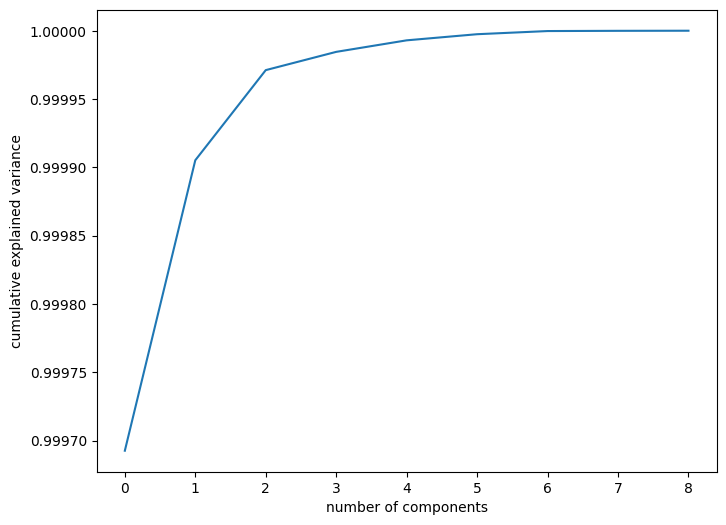

In [ ]:
pca=PCA().fit(x.data)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


pca = PCA(n_components=2)
xscaled=StandardScaler().fit_transform(x)
pca.fit(xscaled)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

[0.23653434 0.21116202]
